# Linear Model Review

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Linear models for regression


```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_
```

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, true_coefficient = make_regression(n_samples=80, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
print(X_train.shape)
print(y_train.shape)

(60, 30)
(60,)


## Linear Regression

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$

In [3]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
print("R^2 on training set: %f" % linear_regression.score(X_train, y_train))
print("R^2 on test set: %f" % linear_regression.score(X_test, y_test))

R^2 on training set: 0.877842
R^2 on test set: 0.492723


In [4]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.729977472078


<IPython.core.display.Javascript object>


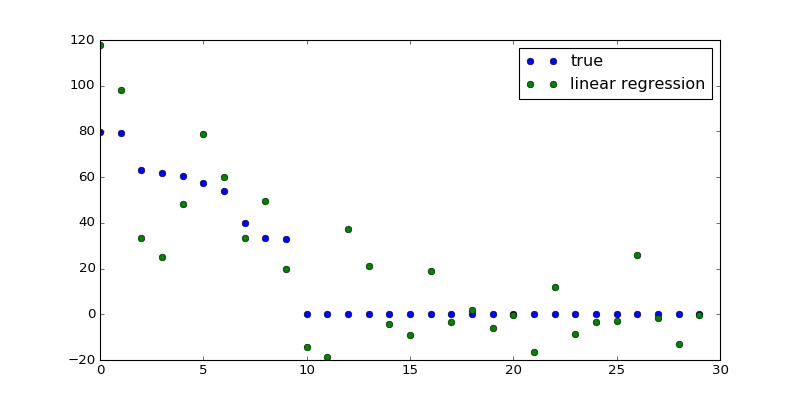

In [5]:
plt.figure(figsize=(10, 5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label="true")
plt.plot(linear_regression.coef_[coefficient_sorting], "o", label="linear regression")

plt.legend()

## Ridge Regression (L2 penalty)

$$ \text{min}_{w,b}  \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_2^2$$ 

<IPython.core.display.Javascript object>


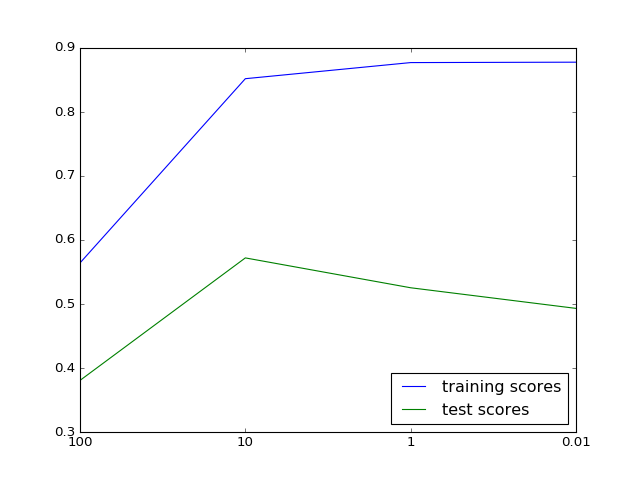

In [6]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")

<IPython.core.display.Javascript object>


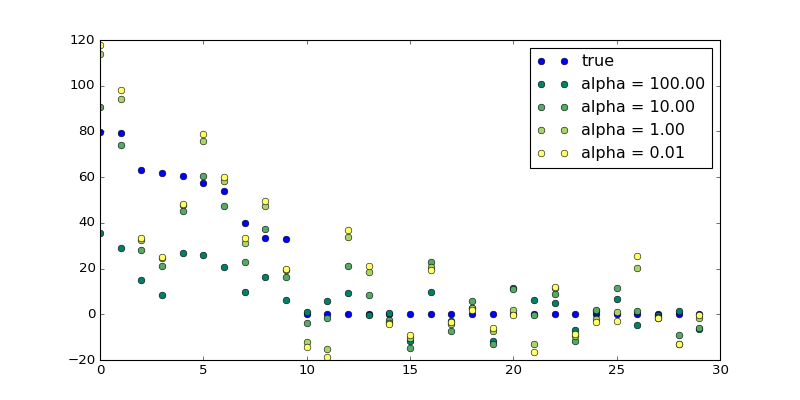

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([100, 10, 1, .01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

## Lasso (L1 penalty)
$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_1$$ 

<IPython.core.display.Javascript object>


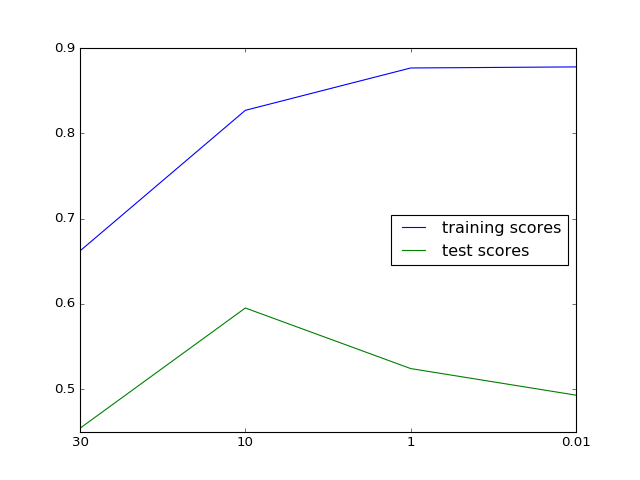

In [8]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, .01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso
plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [30, 10, 1, .01])
plt.legend(loc="best")

<IPython.core.display.Javascript object>


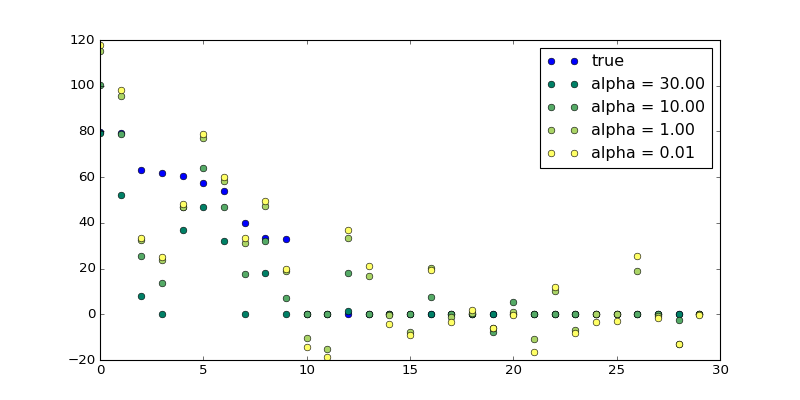

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([30, 10, 1, .01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

## Linear models for classification


```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_ > 0
```

The influence of C in LinearSVC

<IPython.core.display.Javascript object>


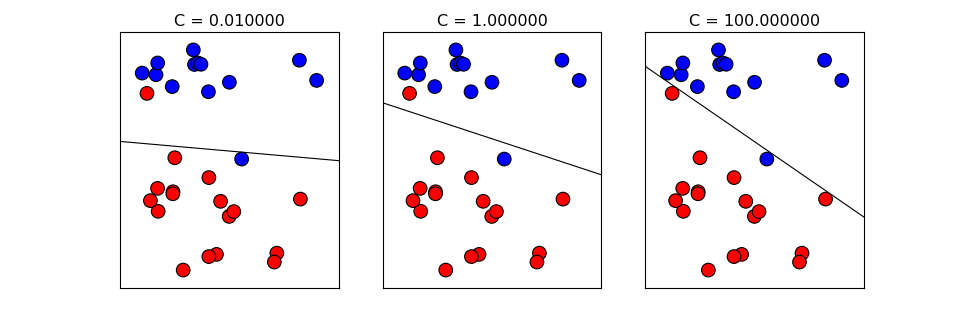

In [10]:
from plots import plot_linear_svc_regularization
plot_linear_svc_regularization()

## Multi-Class linear classification

<IPython.core.display.Javascript object>


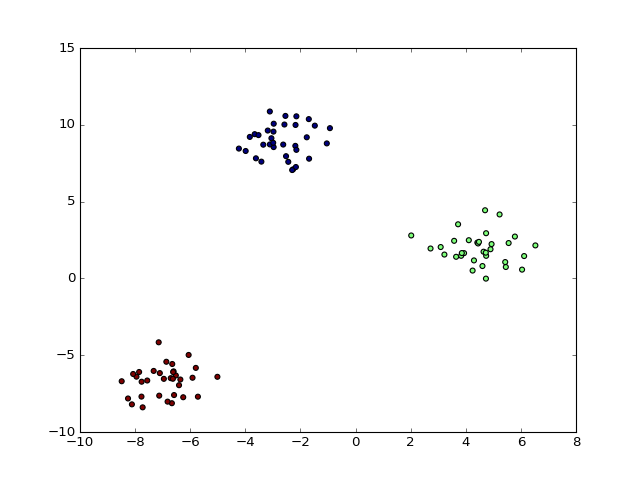

In [11]:
from sklearn.datasets import make_blobs
plt.figure()
X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X, y)
print(lr.coef_.shape)
print(lr.intercept_.shape)

(3, 2)
(3,)


<IPython.core.display.Javascript object>


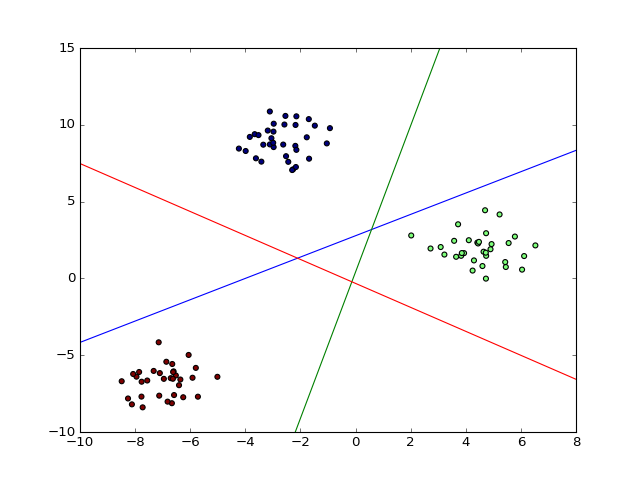

In [13]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
line = np.linspace(-15, 15)
for coef, intercept in zip(lr.coef_, lr.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.show()

# Exercises

Load the bike rental and bank campaign datasets.
For each dataset, try L1 penalized and L2 penalized linear models and plot the coefficients.
Which features are impotant?
Change the regularization parameter and check the changes in training set performance and test set performance.